In [1]:
!pip install POT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 24.1 MB/s eta 0:00:00


In [2]:
import numpy as np
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import ot

In [17]:
def adj_to_dist(adj_matrix):

    n = len(adj_matrix)
    distance_matrix = np.full((n, n), np.inf)

    for start in range(n):
        #BFS
        queue = deque([start])
        distances = [-1] * n
        distances[start] = 0

        while queue:
            current = queue.popleft()
            for neighbor in range(n):
                if adj_matrix[current][neighbor] == 1 and distances[neighbor] == -1:
                    distances[neighbor] = distances[current] + 1
                    queue.append(neighbor)

        for end in range(n):
            if distances[end] != -1:
                distance_matrix[start][end] = distances[end]

    return distance_matrix.astype(int)

In [18]:
def p_lazy_srw(adj_matrix, p):

    # p : idleness parameter
    adj_matrix=np.array(adj_matrix)
    n = len(adj_matrix)
    distributions = np.zeros((n, n))

    for i in range(n):
        dist = np.zeros(n)
        neighbors = np.where(adj_matrix[i] > 0)[0]
        deg = len(neighbors)

        if deg == 0:
            dist[i] = 1.0
        else:
            dist[i] = p
            dist[neighbors] = (1 - p) / deg

        distributions[i] = dist

    return distributions

In [19]:
def Wasserstein_distance(adj_matrix, node_1,node_2,p):

    n = len(adj_matrix)
    distributions = p_lazy_srw(adj_matrix,p)
    dist_matrix = adj_to_dist(adj_matrix)

    Wdistance_matrix=np.zeros((n,n))
    Wdistance = ot.emd2(distributions[node_1], distributions[node_2], dist_matrix)

    return Wdistance

In [20]:
def p_curvature(adj_matrix,node_1,node_2,p):

  dist = adj_to_dist(adj_matrix)
  p_curvature = 1 - (Wasserstein_distance(adj_matrix,node_1,node_2,p)/dist[node_1,node_2])

  return p_curvature

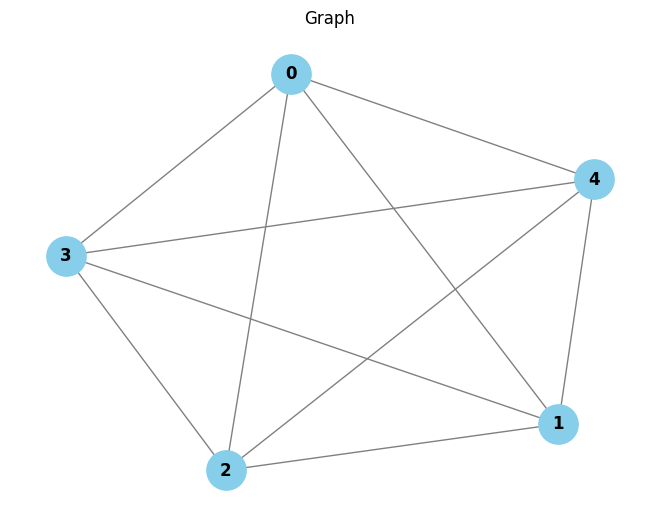

In [28]:
adj_matrix=[[0,1,1,1,1],
            [1,0,1,1,1],
            [1,1,0,1,1],
            [1,1,1,0,1],
            [1,1,1,1,0]]

G = nx.from_numpy_array(np.array(adj_matrix))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray',
        node_size=800, font_size=12, font_weight='bold')

plt.title("Graph")
plt.show()

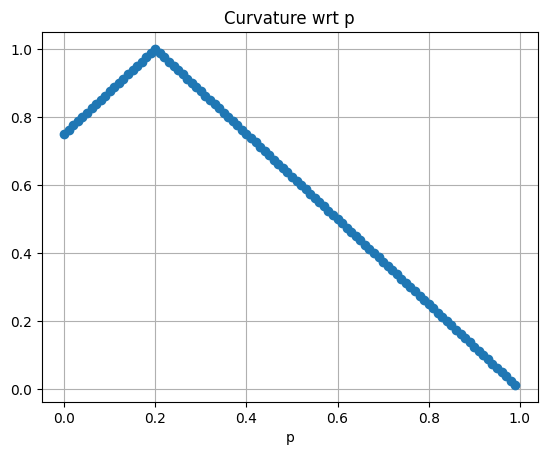

In [29]:
node_1 = 0
node_2 = 1

p_values = np.arange(0,1,0.01)

curvatures=[]

for p in p_values:
  curvature = p_curvature(adj_matrix,node_1,node_2,p)
  curvatures.append(curvature)

plt.plot(p_values,curvatures,marker='o')
plt.xlabel('p')
plt.title('Curvature wrt p')
plt.grid(True)
plt.show()

In [26]:
curvature = p_curvature(adj_matrix,node_1,node_2,0.99)/0.01
print('curvature[%d][%d] is %f ' %(node_1,node_2,curvature))

curvature[0][1] is 1.250000 
